## t-SNE to the plane

In [46]:
import pandas as pd

dffile = "./data/ec_rk0-2_cond1000-10000.csv"

df = pd.read_csv(dffile)
df

,ec,rank,conductor,a1,a2,a3,a4,a5,a6,a7,...,a991,a992,a993,a994,a995,a996,a997,a998,a999,a1000
0,1001.b1,0,1001,-1,0,-2,-1,1,-1,-2,...,-30,-78,100,-18,-90,136,-132,-106,-100,-48
1,1001.b2,0,1001,-1,0,-2,-1,1,-1,-2,...,-30,-78,100,-18,-90,136,-132,-106,-100,-48
2,1001.b3,0,1001,-1,0,-2,-1,1,-1,-2,...,-30,-78,100,-18,-90,136,-132,-106,-100,-48
3,1001.b4,0,1001,-1,0,-2,-1,1,-1,-2,...,-30,-78,100,-18,-90,136,-132,-106,-100,-48
4,1002.a1,0,1002,-1,-1,0,0,0,-4,6,...,50,154,152,-34,74,128,102,-96,116,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59568,9962.a1,2,9962,1,-1,-4,1,-4,-6,-1,...,-144,99,77,146,-36,108,72,-122,126,-49
59569,9963.c1,2,9963,0,0,-2,-4,2,-1,-2,...,94,-14,139,-127,36,-64,-88,42,114,-12
59570,9966.c1,2,9966,1,-1,-3,-4,-1,-3,-4,...,96,108,32,66,-46,-21,-67,110,94,86
59571,9978.a1,2,9978,-1,-1,-2,-1,-1,-2,-5,...,-117,31,174,101,-126,47,-111,21,54,-86


Quick check on the correctness of random data frame entries:

In [47]:
i = randint(0,df.shape[0]-1)
j = randint(1,1000)

E = EllipticCurve(QQ, df['ec'].values[i])
p = Primes().unrank(j-1)
a = 'a' + str(j)

print(E)
print(f'Prime {p}')
print(f'Check p+1-|Ep| = {df[a].values[i]} ... {p+1-E.Np(p) == df[a].values[i]}')
print(f'Check conductor = {df["conductor"].values[i]} ... {E.conductor() == df["conductor"].values[i]}')
print(f'Check rank = {df["rank"].values[i]} ... {E.rank() == df["rank"].values[i]}')

Elliptic Curve defined by y^2 = x^3 + x^2 - 133*x - 137 over Rational Field
Prime 3877
Check p+1-|Ep| = 102 ... True
Check conductor = 3700 ... True
Check rank = 0 ... True


**OPTIONAL STEP:** normalise the _a_ variables to _a_i / 2sqrt(pi)_:

In [48]:
from math import sqrt

for i in range(1000):
    p = Primes().unrank(i)
    a = 'a'+str(i+1)
    df[a] = df[a]/(2*sqrt(p))

df

,ec,rank,conductor,a1,a2,a3,a4,a5,a6,a7,...,a991,a992,a993,a994,a995,a996,a997,a998,a999,a1000
0,1001.b1,0,1001,-0.353553,0.000000,-0.447214,-0.188982,0.150756,-0.138675,-0.242536,...,-0.169397,-0.440095,0.563723,-0.101431,-0.507028,0.766079,-0.743358,-0.596259,-0.562295,-0.269697
1,1001.b2,0,1001,-0.353553,0.000000,-0.447214,-0.188982,0.150756,-0.138675,-0.242536,...,-0.169397,-0.440095,0.563723,-0.101431,-0.507028,0.766079,-0.743358,-0.596259,-0.562295,-0.269697
2,1001.b3,0,1001,-0.353553,0.000000,-0.447214,-0.188982,0.150756,-0.138675,-0.242536,...,-0.169397,-0.440095,0.563723,-0.101431,-0.507028,0.766079,-0.743358,-0.596259,-0.562295,-0.269697
3,1001.b4,0,1001,-0.353553,0.000000,-0.447214,-0.188982,0.150756,-0.138675,-0.242536,...,-0.169397,-0.440095,0.563723,-0.101431,-0.507028,0.766079,-0.743358,-0.596259,-0.562295,-0.269697
4,1002.a1,0,1002,-0.353553,-0.288675,0.000000,0.000000,0.000000,-0.554700,0.727607,...,0.282328,0.868906,0.856858,-0.191593,0.416890,0.721015,0.574413,-0.540008,0.652262,-0.022475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59568,9962.a1,2,9962,0.353553,-0.288675,-0.894427,0.188982,-0.603023,-0.832050,-0.121268,...,-0.813105,0.558583,0.434066,0.822721,-0.202811,0.608357,0.405468,-0.686260,0.708492,-0.275316
59569,9963.c1,2,9963,0.000000,0.000000,-0.447214,-0.755929,0.301511,-0.138675,-0.242536,...,0.530777,-0.078991,0.783574,-0.715655,0.202811,-0.360508,-0.495572,0.236254,0.641016,-0.067424
59570,9966.c1,2,9966,0.353553,-0.288675,-0.670820,-0.755929,-0.150756,-0.416025,-0.485071,...,0.542070,0.609363,0.180391,0.371915,-0.259148,-0.118292,-0.377311,0.618759,0.528557,0.483207
59571,9978.a1,2,9978,-0.353553,-0.288675,-0.447214,-0.188982,-0.150756,-0.277350,-0.606339,...,-0.660648,0.174910,0.980877,0.569143,-0.709839,0.264748,-0.625097,0.118127,0.303639,-0.483207


Extract array and compute t-SNE dimensional reduction:

In [59]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# sample rows uniformly
#ssize = 10000
#idx = sorted([choice(range(0,df.shape[0])) for _ in range(ssize)])

# or by size of conductor
idx = [i for i in range(df.shape[0]) if df["conductor"][i] > 8000]

# extract features to use
nprimes = 100
idy = ['a'+str(i) for i in range(1,nprimes + 1)]

# high-dimensional array
X = df[idy].iloc[idx].to_numpy()

# t-SNE computation
X_tsne = TSNE(n_components = 2).fit_transform(X)
print(f'tSNE frame {X_tsne.shape}')

# PCA decomposition for comparison
X_pca = PCA().fit_transform(X)
print(f'PCA frame {X_pca.shape}')

tSNE frame (13332, 2)
PCA frame (13332, 100)


Create new data frame (and write to file if necessary):

In [61]:
df_proj = df.iloc[idx][['ec','rank','conductor']]

df_proj['x1'] = X_tsne[:,0]
df_proj['x2'] = X_tsne[:,1]
df_proj['z1'] = X_pca[:,0]
df_proj['z2'] = X_pca[:,1]

df_proj

,ec,rank,conductor,x1,x2,z1,z2
21319,8001.g1,0,8001,-12.999024,16.537735,-0.584085,-0.672829
21320,8004.b1,0,8004,23.178123,50.106228,-0.910099,-0.227272
21321,8008.a1,0,8008,46.428997,3.304947,-0.191876,0.049339
21322,8008.d1,0,8008,85.703461,4.209292,-0.807218,-0.425719
21323,8008.d2,0,8008,85.703423,4.209200,-0.807218,-0.425719
...,...,...,...,...,...,...,...
59568,9962.a1,2,9962,19.321615,40.242840,0.812469,-0.615826
59569,9963.c1,2,9963,-19.558887,38.017429,0.381485,-0.235295
59570,9966.c1,2,9966,0.153795,-59.034698,0.783472,-0.114959
59571,9978.a1,2,9978,-7.288002,33.133427,0.991114,-0.619618


Plot points in the plane: 

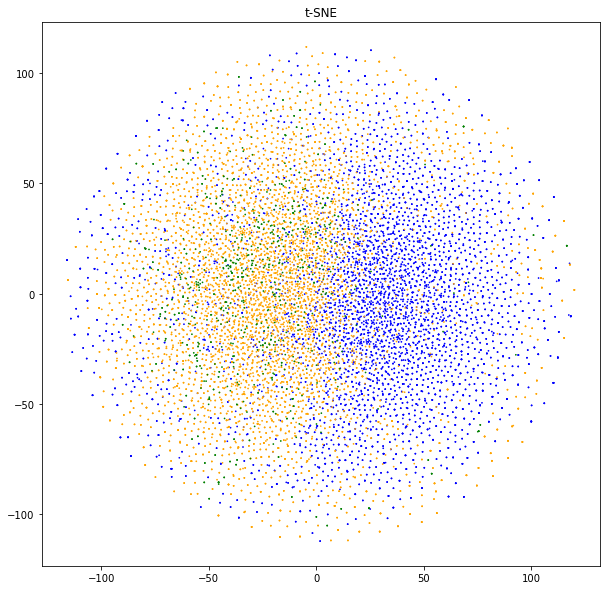

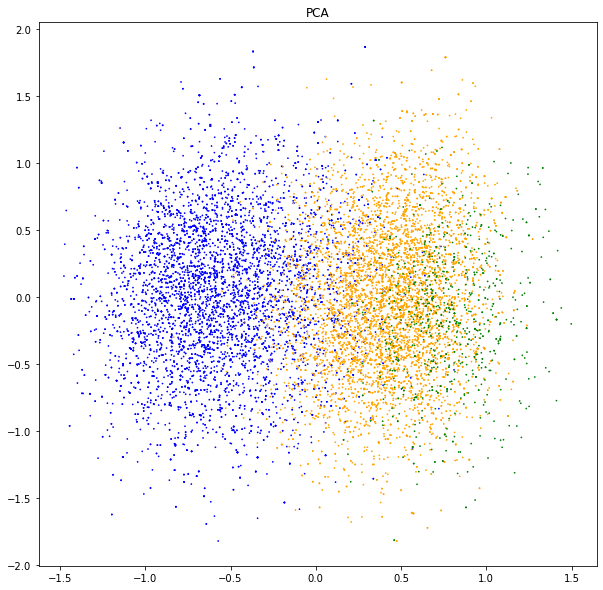

In [62]:
from matplotlib import pyplot as plt

#c = df_proj['rank']
col_d = {0: 'blue', 1: 'orange', 2: 'green'}
col = [col_d[r] for r in df_proj['rank']]

plt.figure(figsize=(10,10))
plt.scatter(df_proj['x1'],
            df_proj['x2'], 
            s=0.5, c=col)
plt.title("t-SNE")
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(df_proj['z1'],
            df_proj['z2'], 
            s=0.5, c=col)
plt.title("PCA")
plt.show()

## Taking initial window averages as feature vector

Motivated by the analysis in the notebook _primeseries_, we can see a better feature set to try: namely the vector of initial moving averages over succesively larger window sizes.

In [53]:
import numpy as np

# set prime range: based on murmuration plot we'll use a run of 100 primes either from p1 or from p450
nprimes = 100
first = 1
rg = range(first,first + nprimes)

# set features
v = ['a'+str(j) for j in rg]
for j in rg:
    df['b'+str(j)] = df[v[:j]].mean(axis=1)
    
df

,ec,rank,conductor,a1,a2,a3,a4,a5,a6,a7,...,b91,b92,b93,b94,b95,b96,b97,b98,b99,b100
0,1001.b1,0,1001,-0.353553,0.000000,-0.447214,-0.188982,0.150756,-0.138675,-0.242536,...,0.064908,0.070163,0.077204,0.083104,0.081287,0.080440,0.086465,0.078877,0.073664,0.081096
1,1001.b2,0,1001,-0.353553,0.000000,-0.447214,-0.188982,0.150756,-0.138675,-0.242536,...,0.064908,0.070163,0.077204,0.083104,0.081287,0.080440,0.086465,0.078877,0.073664,0.081096
2,1001.b3,0,1001,-0.353553,0.000000,-0.447214,-0.188982,0.150756,-0.138675,-0.242536,...,0.064908,0.070163,0.077204,0.083104,0.081287,0.080440,0.086465,0.078877,0.073664,0.081096
3,1001.b4,0,1001,-0.353553,0.000000,-0.447214,-0.188982,0.150756,-0.138675,-0.242536,...,0.064908,0.070163,0.077204,0.083104,0.081287,0.080440,0.086465,0.078877,0.073664,0.081096
4,1002.a1,0,1002,-0.353553,-0.288675,0.000000,0.000000,0.000000,-0.554700,0.727607,...,0.057518,0.062853,0.058279,0.059579,0.054711,0.048568,0.050352,0.047603,0.041822,0.034525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59568,9962.a1,2,9962,0.353553,-0.288675,-0.894427,0.188982,-0.603023,-0.832050,-0.121268,...,-0.093974,-0.084013,-0.086764,-0.089682,-0.089209,-0.087815,-0.088052,-0.093189,-0.101744,-0.108035
59569,9963.c1,2,9963,0.000000,0.000000,-0.447214,-0.755929,0.301511,-0.138675,-0.242536,...,-0.038679,-0.043225,-0.036670,-0.033879,-0.043889,-0.046219,-0.036603,-0.040253,-0.037859,-0.039630
59570,9966.c1,2,9966,0.353553,-0.288675,-0.670820,-0.755929,-0.150756,-0.416025,-0.485071,...,-0.082575,-0.086644,-0.076454,-0.075881,-0.073904,-0.068722,-0.076239,-0.080378,-0.082658,-0.082691
59571,9978.a1,2,9978,-0.353553,-0.288675,-0.447214,-0.188982,-0.150756,-0.277350,-0.606339,...,-0.087106,-0.080945,-0.082023,-0.085952,-0.076565,-0.072981,-0.074284,-0.082467,-0.077218,-0.080745


Select rows/features and compute dimensional reductions:

In [54]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# sample rows uniformly
ssize = 30000
idx = sorted([choice(range(0,df.shape[0])) for _ in range(ssize)])

# or by size of conductor
#idx = [i for i in range(df.shape[0]) if df["conductor"][i] > 8000]

# extract features to use
idy = ['b'+str(i) for i in rg]

# high-dimensional array
X = df[idy].iloc[idx].to_numpy()

# t-SNE computation
X_tsne = TSNE(n_components = 2).fit_transform(X)
print(f'tSNE frame {X_tsne.shape}')

# PCA decomposition for comparison
X_pca = PCA().fit_transform(X)
print(f'PCA frame {X_pca.shape}')

# make data frame
df_proj = df.iloc[idx][['ec','rank','conductor']]

df_proj['x1'] = X_tsne[:,0]
df_proj['x2'] = X_tsne[:,1]
df_proj['z1'] = X_pca[:,0]
df_proj['z2'] = X_pca[:,1]

df_proj

tSNE frame (30000, 2)
PCA frame (30000, 100)


,ec,rank,conductor,x1,x2,z1,z2
0,1001.b1,0,1001,3.715886,66.692070,-0.056914,0.770101
0,1001.b1,0,1001,3.715886,66.692070,-0.056914,0.770101
1,1001.b2,0,1001,3.715886,66.692070,-0.056914,0.770101
4,1002.a1,0,1002,-35.695389,54.710419,-0.636106,0.839747
4,1002.a1,0,1002,-35.695389,54.710419,-0.636106,0.839747
...,...,...,...,...,...,...,...
59566,9950.c1,2,9950,92.481422,23.323195,1.602957,0.184095
59566,9950.c1,2,9950,92.481422,23.323195,1.602957,0.184095
59567,9950.j1,2,9950,115.746933,-15.971894,1.699341,-0.124948
59567,9950.j1,2,9950,115.746933,-15.971894,1.699341,-0.124948


Check the rank distribution on this subframe:

In [55]:
from collections import Counter

Counter(df_proj["rank"])

Counter({1: 15085, 0: 13732, 2: 1183})

Plot the results:

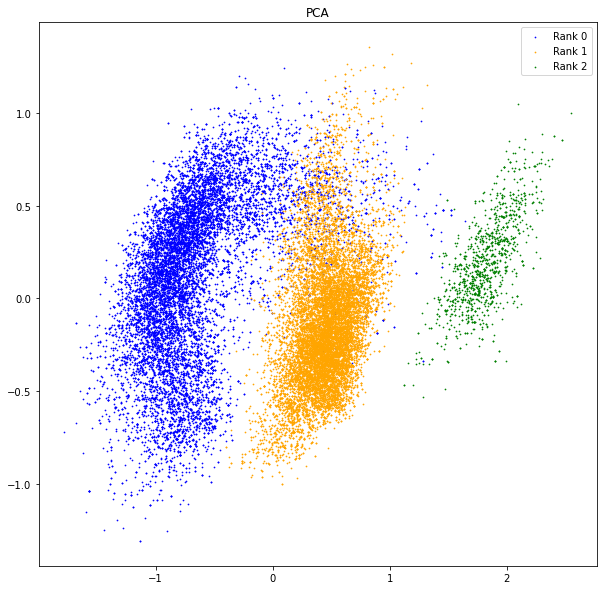

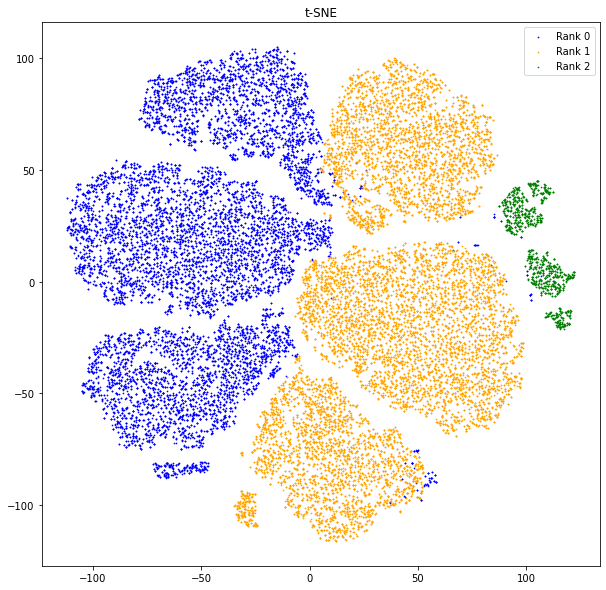

In [56]:
from matplotlib import pyplot as plt
from matplotlib import rc

rc('figure', figsize=(10, 10))

c = df_proj['rank']
col = ['blue', 'orange', 'green']

# PCA
fig, ax = plt.subplots()
for i in range(3):
    x = df_proj['z1'][c==i], 
    y = df_proj['z2'][c==i], 
    ax.scatter(x, y,
               s = 0.5,
               c=col[i], 
               label='Rank '+str(i))
ax.legend()
ax.grid(False)
plt.title('PCA')
plt.show()

# t-SNE
fig, ax = plt.subplots()
for i in range(3):
    x = df_proj['x1'][c==i], 
    y = df_proj['x2'][c==i], 
    ax.scatter(x, y,
               s = 0.5,
               c=col[i], 
               label='Rank '+str(i))
ax.legend()
ax.grid(False)
plt.title('t-SNE')
plt.show()

Save the results:

In [9]:
dffile = "./data/ec_rk0-2_cond1000-10000_proj.csv"
df_proj.to_csv(dffile, index=False)